# **Notebook 1 - Introducción a RNN y LSTM.**


*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*
*   Recuerda que Google es tu amigo, y saber buscar la información en las documentaciones de las librerías es muy importante.
*   Una solución correcta no es la que funciona sino la que se entiende!
*   No dudes en preguntar cualquier duda al profesor que lleva todo el día dando la turra.

## **A. Ejemplo de uso de una red LSTM.**
* Ejemplos de código de Keras y NLP - [(Fuente)](https://keras.io/examples/nlp/)




In [1]:
from tensorflow.keras.datasets import imdb

In [12]:
import tensorflow
from tensorflow.keras.datasets import imdb

max_features = 88584  # Tamaño total de nuestro vocabulario.
max_len = 200

(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=max_features)

In [13]:
len(imdb.get_word_index())

88584

In [15]:
# Obtenemos el glosario de palabras del vocabulario.
vocab = tensorflow.keras.datasets.imdb.get_word_index()

# Generamos un dictionario inverso para poder decodificar también las frase.
index = {v: k for k, v in vocab.items()}

In [16]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

embed_size = 128

# Input de tamaño variable para distintas longitudes de secuencias.
inputs = keras.Input(shape=(None,), dtype="int32")

# Usamos una primera capa de embeddings que aprenderá a representar nuestro input.
x = layers.Embedding(max_features, embed_size)(inputs)

# Añadimos dos capas LSTMs. Usamos 'return_sequences' para que la capa externalice
# los vectores ocultas, que serán el input de la siguiente capa.
x = layers.LSTM(64, return_sequences=True, return_states=True)(x)
x = layers.LSTM(32)(x)

# Añadimos una capa clasificadora que tomará como input el último vector
# oculto y usará esa información para generar una predicción.
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 128)         11338752  
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          49408     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 11,421,249
Trainable params: 11,421,249
Non-trainable params: 0
_________________________________________________________________


In [17]:
print(len(x_train), "Training sequences")
print(len(x_valid), "Validation sequences")

x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_valid = keras.preprocessing.sequence.pad_sequences(x_valid, maxlen=max_len)

25000 Training sequences
25000 Validation sequences


In [19]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_valid, y_valid))

Epoch 1/2
782/782 [==============================] - 105s 135ms/step - loss: 0.0514 - accuracy: 0.9849 - val_loss: 0.4493 - val_accuracy: 0.8539
Epoch 2/2
782/782 [==============================] - 105s 134ms/step - loss: 0.0217 - accuracy: 0.9948 - val_loss: 0.6624 - val_accuracy: 0.8482


In [ ]:
idx = 150

review = x_valid[idx]
realY  = y_valid[idx]

# Decodificamos una frase para echarle un ojo.
print(" ".join([index.get(word - 3, '') for word in review]) + "\n")

# Realizamos la predicción.
pred = model.predict(review.reshape(1, -1))[0][0]
('Pred:', pred, 'Real', realY, 'Positivo 😁') if pred > 0.5 else ('Pred:', pred, 'Real', realY, 'Negativo 😪')

                                                                         i thought this would be a fun comedy with no sex or nudity in it well there's no sexual content but as for being a fun comedy i only remember laughing a total three times during the green  the hilarity is centered around cannibalism and mental  which is just sick humor in a bad way br br i should have walked out of this film and i'm kicking myself because i didn't in fact i shouldn't have seen this movie in the first place the only good that came out of this film was was the fact that and his brother finally made amends and put their ugly past behind them i advise any well meaning individual to steer clear of this gross out flick



('Pred:', 0.104906075, 'Real', 0, 'Negativo 😪')

In [ ]:
# test_txt = input()

test_txt = "this movie has a really bad plot and the characters are not very well defined its a nonsense in many aspects the director tried to do a good work but the result is horrible"
vectorized = [vocab.get(w, 0) + 3 for w in test_txt.split()]
vectorized = np.array(vectorized)
vectorized[vectorized > max_features] = 0
vectorized = keras.preprocessing.sequence.pad_sequences([vectorized], maxlen=max_len)

pred = model.predict(vectorized.reshape(1, -1))[0][0]

(pred, 'Positivo 😁') if pred > 0.5 else (pred, 'Negativo 😪')

(0.05856452, 'Negativo 😪')

## **B. Ejemplo de uso de una red LSTM en combinación con capas Conv2D.**

> ***OBJETIVO:*** Una red neuronal que para un conjunto de imágenes de números te calcule su suma.

> ***DISCLAIMER:*** Lo más probable es que para este problema el uso de una LSTM sea innecesario. En cualquier caso, el ejemplo es púramente didáctico.

> ¿ Cuál es la diferencia entre una capa *TimeDistributed(Conv2D)* y una capa *ConvLSTM2D()* ?


In [20]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), (x_val, y_val) = keras.datasets.mnist.load_data()

print(x_train.shape)

n_digits = 4

# Training data.
X_trsum = x_train.reshape(-1, n_digits, 28, 28, 1) / 255.
Y_trsum = np.sum(y_train.reshape(-1, n_digits), axis=1)

# Validation data.
X_vlsum = x_val.reshape(-1, n_digits, 28, 28, 1) / 255.
Y_vlsum = np.sum(y_val.reshape(-1, n_digits), axis=1)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)


In [26]:
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers     import *

model = Sequential()

# Colocamos en la dimensión 1 el número de steps de nuestra secuencia
# (el batch_size es la dimensión 0 y se omite)
model.add(Input((n_digits, 28, 28, 1)))

# El wrapper TimeDistributed convierte la dimensión con índice 1 (empezando en 0)
# en una secuencia temporal, donde cada imagen será procesada independientemente
# por dicha capa. En este caso, cada una de las imágenes será procesada por las
# capas convolucionales, y la secuencia de vectores extraídos será el input de 
# una capa LSTM que lo procesará secuencialmente. (cosa que para el problema de 
# sumar los dígitos de las imágenes pues a lo mejor no tiene tanto sentido.)


model.add(TimeDistributed(Conv2D(8,  3, 2, padding='same', activation='relu'))) # Capa convolucional.
model.add(TimeDistributed(Conv2D(16, 3, 2, padding='same', activation='relu'))) # Capa convolucional.
model.add(TimeDistributed(Conv2D(32, 3, 2, padding='same', activation='relu'))) # Capa convolucional.

model.add(TimeDistributed(Flatten())) # Aplanamos los outputs de cada capa convolucional a vectores 1-dimensionales.

# La secuencia de vectores unidimensionales (recordemos, secuencia conseguida gracias a TimeDistributed) será el input
# en cada step de la capa LSTM.
model.add(LSTM(32, input_shape=(n_digits, 32*4*n_digits), activation='tanh'))

# El output del último step de la LSTM será el input de la capa densa.
model.add(Dense(16, activation='relu'))
model.add(Dense(1,  activation='relu'))

model.summary()
model.compile(optimizer=Adam(lr=0.0005), loss='mse')
model.fit(X_trsum, Y_trsum, validation_data=(X_vlsum, Y_vlsum), epochs=30)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_16 (TimeDis (None, 4, 14, 14, 8)      80        
_________________________________________________________________
time_distributed_17 (TimeDis (None, 4, 7, 7, 16)       1168      
_________________________________________________________________
time_distributed_18 (TimeDis (None, 4, 4, 4, 32)       4640      
_________________________________________________________________
time_distributed_19 (TimeDis (None, 4, 512)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                69760     
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                

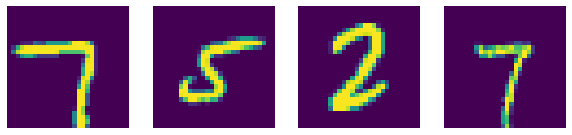

Valor Pred:  21.458984
Valor Real:  21


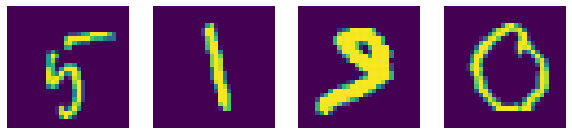

Valor Pred:  11.8912525
Valor Real:  15


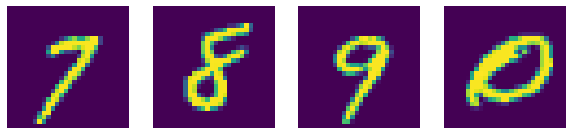

Valor Pred:  25.160913
Valor Real:  24


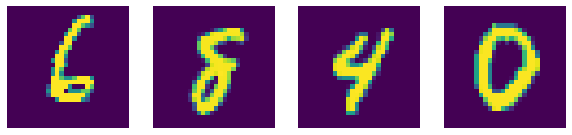

Valor Pred:  17.395662
Valor Real:  18


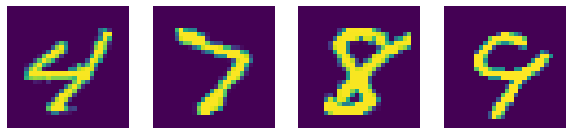

Valor Pred:  27.379868
Valor Real:  28


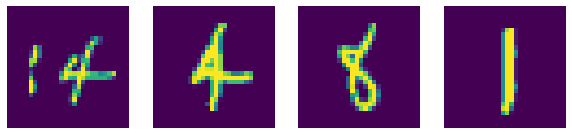

Valor Pred:  16.845133
Valor Real:  17


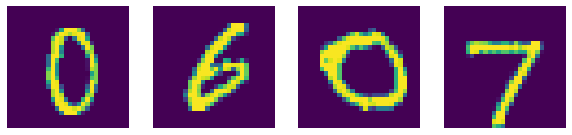

Valor Pred:  12.132798
Valor Real:  13


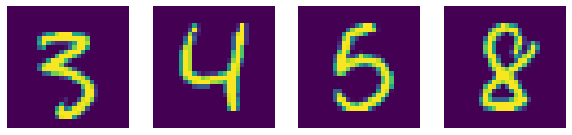

Valor Pred:  20.39506
Valor Real:  20


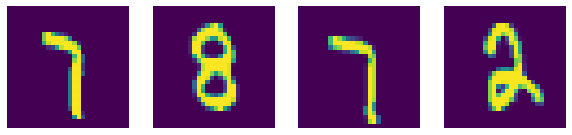

Valor Pred:  24.131788
Valor Real:  24


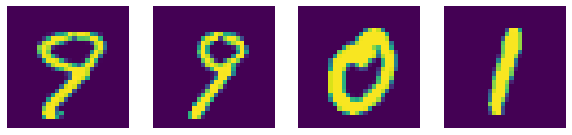

Valor Pred:  18.936756
Valor Real:  19


In [27]:
# Visualizamos 10 ejemplos de sumas.
for i in range(10):
  # Sacamos un set de imágenes aleatorio.
  idx = np.random.randint(len(X_vlsum))

  # Lo visualizamos...
  fig, axs = plt.subplots(1, 4, figsize=(10, 10))
  for d in range(n_digits):
    fig.axes[d].matshow(X_vlsum[idx, d, ..., 0])
    fig.axes[d].axis('off')
  plt.show()
  
  # Y comprobamos su resultado.
  print('Valor Pred: ', model.predict(X_vlsum[idx:idx+1, ...])[0][0])
  print('Valor Real: ', Y_vlsum[idx:idx+1, ...][0])